# **Project Name**  - Amazon Prime Video Content Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

**Project Summary:**
- With the rapid expansion of the streaming industry, Amazon Prime Video has become one of the leading platforms, offering a vast and diverse content library. This project aims to perform a comprehensive exploratory data analysis (EDA) on the available content to uncover trends, regional availability, and viewer preferences, enabling data-driven decision-making for optimizing content curation and audience engagement.

**Dataset Overview:**
- The dataset comprises two key files:

     - titles.csv: Contains over 9,000 unique titles with information such as show type, genres, production countries, IMDb ratings, and release years.

     - credits.csv: Includes more than 124,000 records of actors and directors, mapping them to their respective titles.

The dataset includes both categorical (e.g., genres, production countries) and numerical (e.g., IMDb scores, runtime) attributes, allowing for a comprehensive analysis of Amazon Prime's content library.

**Analysis Approach:**
- The project follows a structured exploratory data analysis (EDA) approach to uncover trends and patterns within the dataset. Various aspects such as content type distribution, regional production trends, genre popularity, and IMDb ratings are analyzed. The analysis is visualized through different types of charts and graphs, providing clear insights into the data.

**Business Objective:**
- The primary business objective of this analysis is to optimize content curation and audience engagement on Amazon Prime Video. By understanding content trends, regional preferences, and viewer ratings, Amazon can make informed decisions to enhance its content offerings and improve user satisfaction.

# **GitHub Link -**

https://github.com/Souvikcode05/Capstone-project

# **Problem Statement**


This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

1. Content Diversity: What genres and categories dominate the platform?
2. Regional Availability: How does content distribution vary across different regions?
3. Trends Over Time: How has Amazon Prime’s content library evolved?
4. IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?

#### **Define Your Business Objective?**

Business Objective: Optimizing Content Curation and Audience Engagement on Amazon Prime Video

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For statistical data visualization
import plotly.express as px  # For interactive visualizations
import plotly.colors as pc  # Import plotly color schemes
import plotly.graph_objects as go  # For creating advanced Plotly plots
from plotly.subplots import make_subplots  # To create subplots for multiple charts
import plotly.figure_factory as ff # For creating distribution plots and other advanced visualizations

import warnings  # To handle warnings
# Ignore all warnings
warnings.filterwarnings("ignore")  # Suppresses all warnings from appearing

# Mount Google Drive to Access Files (Specific to Google Colab)
from google.colab import drive
drive.mount('/content/drive')   # Grants access to Google Drive storage

# Configure pandas display options
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame


Mounted at /content/drive


### Dataset Loading

In [ ]:
# load Dataset

# Function to load a CSV file into a pandas DataFrame
def load_csv(file_path):
    """
    Loads a CSV file into a pandas DataFrame.
    If an error occurs (e.g., file not found), it prints the error and returns None.

    Parameters:
    file_path (str): The file path of the CSV file.

    Returns:
    pd.DataFrame or None: Returns the loaded DataFrame if successful, otherwise None.
    """
    try:
        return pd.read_csv(file_path)  # Load the CSV file
    except Exception as e:
        print(f"Error: {e}")  # Print error message if loading fails
        return None  # Return None in case of failure

# Define file paths for the dfs
path_titles = '/content/drive/MyDrive/capstone project 2/Amazon Prime /Files/titles.csv'  # File path for the 'titles' df
path_credits = '/content/drive/MyDrive/capstone project 2/Amazon Prime /Files/credits.csv'  # File path for the 'credits' df


# Load the dfs using the load_csv function
df_titles = load_csv(file_path=path_titles)  # Load titles df
df_credits = load_csv(file_path=path_credits)  # Load credits df

In [ ]:
# Merge the two dfs on the "id" column using a left join
dataset = pd.merge(df_titles, df_credits, on="id", how="left")

### Dataset First View

In [68]:
# Dataset First Look
dataset.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174.0,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713.0,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(125354, 19)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125354 entries, 0 to 125353
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125354 non-null  object 
 1   title                 125354 non-null  object 
 2   type                  125354 non-null  object 
 3   description           125163 non-null  object 
 4   release_year          125354 non-null  int64  
 5   age_certification     56857 non-null   object 
 6   runtime               125354 non-null  int64  
 7   genres                125354 non-null  object 
 8   production_countries  125354 non-null  object 
 9   seasons               8501 non-null    float64
 10  imdb_id               119978 non-null  object 
 11  imdb_score            118987 non-null  float64
 12  imdb_votes            118957 non-null  float64
 13  tmdb_popularity       124800 non-null  float64
 14  tmdb_score            114263 non-null  float64
 15  

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

168

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

id                           0
title                        0
type                         0
description                191
release_year                 0
age_certification        68497
runtime                      0
genres                       0
production_countries         0
seasons                 116853
imdb_id                   5376
imdb_score                6367
imdb_votes                6397
tmdb_popularity            554
tmdb_score               11091
person_id                 1007
name                      1007
character                17314
role                      1007
dtype: int64


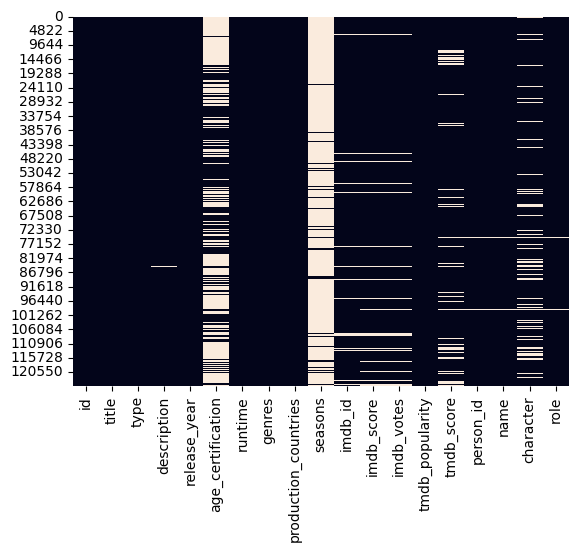

In [ ]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

The dataset given is from the streaming industry, specifically Amazon Prime Video, and we need to analyze the available content and extract meaningful insights.

It consists of two CSV files: titles.csv, which contains information about shows and movies, and credits.csv, which details the cast and crew.

The dataset includes 125,354 rows and 19 columns, combining both categorical and numerical values. It provides information on 9k+ unique titles and 124k+ credits, covering metadata such as title, type (movie or TV show), release year, runtime, genres, production countries, IMDb and TMDB ratings, popularity, and cast details.

Additionally, the dataset contains cast and crew information, including person ID (JustWatch), title ID (JustWatch), actor or director name, character name, and role (ACTOR or DIRECTOR).

There are missing values in several columns, including age certification (68,497), seasons (116,853), IMDb score (6,367), and TMDB score (11,091). Additionally, 168 duplicate rows are present, which require cleaning.

This dataset will help uncover content trends, regional availability, and viewer preferences, enabling data-driven decision-making in the streaming industry.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
dataset.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role'],
      dtype='object')

In [11]:
# Dataset Describe
dataset.describe(include='all')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
count,125354,125354,125354,125163,125354.000000,56857,125354.00000,125354,125354,8501.000000,119978,118987.000000,1.189570e+05,124800.000000,114263.000000,1.243470e+05,124347,108040,124347
unique,9868,9737,2,9734,NaN,11,NaN,2028,497,NaN,9201,NaN,NaN,NaN,NaN,NaN,79758,71097,2
top,tm458582,Coming 2 America,MOVIE,Prince Akeem Joffer is set to become King of Z...,NaN,R,NaN,['drama'],['US'],NaN,tt6802400,NaN,NaN,NaN,NaN,NaN,George 'Gabby' Hayes,Himself,ACTOR
freq,137,137,116853,137,NaN,25941,NaN,10002,69636,NaN,137,NaN,NaN,NaN,NaN,NaN,49,1540,115952
mean,NaN,NaN,NaN,NaN,1996.374715,NaN,95.30792,NaN,NaN,2.335372,NaN,5.970856,2.311206e+04,10.134483,5.993077,4.062528e+05,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,27.758800,NaN,30.39349,NaN,NaN,3.164860,NaN,1.243967,8.816389e+04,40.666765,1.322900,5.614483e+05,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1912.000000,NaN,1.00000,NaN,NaN,1.000000,NaN,1.100000,5.000000e+00,0.000011,0.800000,1.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1983.000000,NaN,82.00000,NaN,NaN,1.000000,NaN,5.200000,2.790000e+02,1.858000,5.300000,3.899600e+04,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2009.000000,NaN,93.00000,NaN,NaN,1.000000,NaN,6.100000,1.227000e+03,3.864000,6.100000,1.339340e+05,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2017.000000,NaN,109.00000,NaN,NaN,2.000000,NaN,6.800000,7.039000e+03,8.787000,6.800000,5.711600e+05,NaN,NaN,NaN


### Variables Description



* **id :** The title ID on JustWatch.
* **title :** The name of the title.
* **show_type :** TV show or movie.
* **description :** A brief description.
* **release_year :** The release year.
* **age_certification :** The age certification.
* **runtime :** The length of the episode (SHOW) or movie.
* **genres :** A list of genres.
* **production_countries :** A list of countries that produced the title.
* **seasons :** Number of seasons if it's a SHOW.
* **imdb_id :** The title ID on IMDB.
* **imdb_score :** Score on IMDB.
* **imdb_votes :** Votes on IMDB.
* **tmdb_popularity :** Popularity on TMDB.
* **tmdb_score :** Score on TMDB.
* **person_ID :** The person ID on JustWatch.
* **name :** The actor or director's name.
* **character_name :** The character name.
* **role :** ACTOR or DIRECTOR.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  id is 9868 .
No. of unique values in  title is 9737 .
No. of unique values in  type is 2 .
No. of unique values in  description is 9734 .
No. of unique values in  release_year is 110 .
No. of unique values in  age_certification is 11 .
No. of unique values in  runtime is 207 .
No. of unique values in  genres is 2028 .
No. of unique values in  production_countries is 497 .
No. of unique values in  seasons is 32 .
No. of unique values in  imdb_id is 9201 .
No. of unique values in  imdb_score is 86 .
No. of unique values in  imdb_votes is 3650 .
No. of unique values in  tmdb_popularity is 5325 .
No. of unique values in  tmdb_score is 89 .
No. of unique values in  person_id is 80508 .
No. of unique values in  name is 79758 .
No. of unique values in  character is 71097 .
No. of unique values in  role is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [41]:
# Write your code to make your df analysis ready.

# Create a copy of the current dataset and assigning to df
df = dataset.copy()

# Select key columns to keep for analysis
key_columns =['id', 'title', 'type', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character','role']

# Filter df to include only the selected columns
df = df.loc[:,key_columns]

In [42]:
# Display the shape of the df (rows, columns)
df.shape

(125354, 18)

In [43]:
# Dataset Duplicate Value Count
df.duplicated().sum()

168

In [44]:
# Remove duplicate rows from the df

df.drop_duplicates(inplace=True)

In [45]:
# Check for duplicate records based on specific columns

df.duplicated(subset=['id' ,'person_id','name' , 'character']).sum()

64

In [46]:
# Remove duplicate rows while keeping the first occurrence

df.drop_duplicates(subset=['id' ,'person_id','name' , 'character'],keep= 'first',inplace=True)

In [47]:
# Display the shape of the df after removing duplicates

df.shape

(125122, 18)

In [48]:
# Function to check the percentage of missing values in each column

def null_percentage_checker(df):
    """Prints the percentage of missing values for each column in a DataFrame."""
    try:
        if not isinstance(df, pd.DataFrame):
            raise TypeError("Input must be a pandas DataFrame.")
        for col in df.columns:
            print(f'{col} : {df[col].isna().mean() * 100:.2f}%')
    except Exception as e:
        print(f"Error: {e}")

# Call the function to check for missing values
null_percentage_checker(df = df)

id : 0.00%
title : 0.00%
type : 0.00%
release_year : 0.00%
age_certification : 54.57%
runtime : 0.00%
genres : 0.00%
production_countries : 0.00%
seasons : 93.21%
imdb_id : 4.29%
imdb_score : 5.08%
imdb_votes : 5.11%
tmdb_popularity : 0.44%
tmdb_score : 8.77%
person_id : 0.80%
name : 0.80%
character : 13.76%
role : 0.80%


In [49]:
# Check the number of movies that have null values in the 'seasons' column

print(df[(df['type'] == 'MOVIE') & (df['seasons'].isnull())].shape)

(116621, 18)


In [50]:
# Display the count of unique values in the 'seasons' column (including NaN)

print(df['seasons'].value_counts(dropna=False).head())

seasons
NaN    116621
1.0      5102
2.0      1313
3.0       741
4.0       371
Name: count, dtype: int64


In [51]:
# Replace NaN values in 'seasons' with 0 for movies (since movies don’t have seasons)

df['seasons']=df.apply(lambda row : 0 if row['type'] == 'MOVIE' else row['seasons'] ,axis=1)

In [52]:
# Fill missing values in the 'age_certification' and  'character' columns with 'Unknown'

df.fillna({'age_certification' : 'Unknown' ,'character' : 'Unknown' } ,inplace=True)

In [53]:
# Re-check for missing values
null_percentage_checker(df = df)


id : 0.00%
title : 0.00%
type : 0.00%
release_year : 0.00%
age_certification : 0.00%
runtime : 0.00%
genres : 0.00%
production_countries : 0.00%
seasons : 0.00%
imdb_id : 4.29%
imdb_score : 5.08%
imdb_votes : 5.11%
tmdb_popularity : 0.44%
tmdb_score : 8.77%
person_id : 0.80%
name : 0.80%
character : 0.00%
role : 0.80%


In [54]:
# Drop remaining rows with missing values
df.dropna(inplace=True)

In [55]:
# Display the shape of the df (rows, columns)
df.shape

(109393, 18)

In [56]:
# Check the number of rows where 'genres' or 'production_countries' is empty

print(df[df["genres"] == "[]"].shape)
print(df[df["production_countries"] == "[]"].shape)

(73, 18)
(1094, 18)


In [57]:
# Remove rows where 'genres' or 'production_countries' are empty

df = df[df["genres"] != "[]"]
df = df[df["production_countries"] != "[]"]

In [58]:
# Display the shape of the df after filtering
df.shape

(108227, 18)

In [59]:
# Print the maximum and minimum release years
print(df['release_year'].max())
print(df['release_year'].min())

# Filter df to include only titles released from 2012 onwards | Keep only titles released in 2012 or later

df = df[df['release_year'] >= 2012]

2022
1912


In [60]:
# Convert 'seasons' and 'person_id' columns to integer type
df['seasons'] = df['seasons'].astype(int)
df['person_id'] = df['person_id'].astype(int)


In [61]:
# Extract the primary genre from the list of genres
df['primary_genre'] = df['genres'].apply(lambda x: str(x.split(',')[0]).strip('[]'))

# Extract the primary country from the list of production countries
df['primary_country'] = df['production_countries'].apply(lambda x: str(x.split(',')[0]).strip('[]'))

In [62]:
# Remove extra quotation marks from extracted genre and country values

df["primary_genre"] = df["primary_genre"].str.strip("'")
df["primary_country"] = df["primary_country"].str.strip("'")

In [63]:
# Create a new df excluding rows where age certification is 'Unknown'
df_without_unknown = df[df['age_certification'] != 'Unknown']

In [64]:
# Filtering df to include only TV Shows
tv_shows_data = df[df['type'] == 'SHOW']

In [65]:
# Function to mark outliers using Interquartile Range (IQR)

def outlier_marking(data, column_name):
    """
    Marks outliers in a given column using the Interquartile Range (IQR) method.

    Parameters:
    data (pd.DataFrame): The df containing the column.
    column_name (str): The name of the column to check for outliers.

    Returns:
    pd.Series: A series with 'Outlier' or 'Not Outlier' labels.
    """
    try:
        # Ensure the column exists and is numeric
        if column_name not in data.columns:
            raise ValueError(f"Column '{column_name}' not found in the df.")
        if not pd.api.types.is_numeric_dtype(data[column_name]):
            raise TypeError(f"Column '{column_name}' must be numeric.")

        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[column_name].quantile(0.25)
        Q3 = data[column_name].quantile(0.75)
        IQR = Q3 - Q1  # Calculate IQR

        # Determine lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Flag outliers
        return data[column_name].apply(
            lambda x: 'Outlier' if x < lower_bound or x > upper_bound else 'Not Outlier'
        )

    except Exception as e:
        print(f"Error: {e}")
        return None


In [66]:
# Display the first few rows of the df
df.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role,primary_genre,primary_country
65100,ts27630,Line of Duty,SHOW,2012,TV-MA,60,"['crime', 'thriller', 'drama', 'european']",['GB'],6,tt2303687,8.7,55784.0,52.202,8.2,22743,Martin Compston,DS Steve Arnott,ACTOR,crime,GB
65101,ts27630,Line of Duty,SHOW,2012,TV-MA,60,"['crime', 'thriller', 'drama', 'european']",['GB'],6,tt2303687,8.7,55784.0,52.202,8.2,589948,Vicky McClure,DC Kate Fleming,ACTOR,crime,GB
65102,ts27630,Line of Duty,SHOW,2012,TV-MA,60,"['crime', 'thriller', 'drama', 'european']",['GB'],6,tt2303687,8.7,55784.0,52.202,8.2,57068,Adrian Dunbar,SI Ted Hastings,ACTOR,crime,GB
65103,ts27630,Line of Duty,SHOW,2012,TV-MA,60,"['crime', 'thriller', 'drama', 'european']",['GB'],6,tt2303687,8.7,55784.0,52.202,8.2,1226698,Gregory Piper,Ryan Pilkington,ACTOR,crime,GB
65104,ts27630,Line of Duty,SHOW,2012,TV-MA,60,"['crime', 'thriller', 'drama', 'european']",['GB'],6,tt2303687,8.7,55784.0,52.202,8.2,208181,Nigel Boyle,DI Ian Buckells,ACTOR,crime,GB


### What all manipulations have you done and insights you found?

#### **Manipulations Performed:-**

1. ****Column Selection****:-

  - Retained only key columns necessary for analysis, such as id, title, type, release_year, genres, seasons, imdb_score, etc.

2. **Duplicate Handling**:-

  - Removed duplicate rows from the dataset to ensure unique entries.
  - Checked for duplicates based on id, person_id, name, and character, and removed them.

3. **Missing Value Treatment**:-

  * Checked the percentage of missing values for each column.
  * Replaced missing values in the age_certification and character columns with "Unknown".
  * Set seasons = 0 for movies (since movies do not have seasons).
  * Dropped any remaining missing values.

4. **Filtering Empty Values**:

  - Removed rows where genres or production_countries were empty ("[]"), ensuring valid data.

5. **Filtering by Release Year**:-

  - Kept only titles released from 2012 onwards, ensuring focus on recent content.
  
6. **Data Type Conversion**:-

  - Converted seasons and person_id columns to integers for consistency.
  - Extracted primary_genre and primary_country from list-like fields (genres and   1. production_countries).
  - Cleaned extracted values by stripping unnecessary characters.

7. **Outlier Detection**:-

  - Used the Interquartile Range (IQR) method to mark outliers in numerical columns.
  - Identified potential outliers in numerical features like runtime, imdb_score, and tmdb_popularity.
  -Marked extreme values as "Outlier" to avoid skewed analysis.

#### **Insights Found:-**

1. **Dominance of Recent Content:-**

  - Most titles in the dataset are from recent years (2012 onwards), indicating  - that older content is either less available or less relevant for this platform.

2. **Handling Missing Data Effectively:-**

  - Many movies had missing values for seasons, which were logically imputed with 0.
  - A significant portion of data had missing age_certification, which was replaced with "Unknown", ensuring consistency.

3. **Genre and Country Analysis:-**

  - Extracting primary_genre and primary_country helped simplify the dataset for easier visualization and analysis.
  - This allows for better insights into dominant genres and production locations.

4. **Outlier Detection for Better Analysis:-**

  - Marking outliers helps in identifying extreme values that might skew analysis, especially for numerical features like runtime, tmdb_popularity, and imdb_score.

5. **Duplicate Removal Ensures Cleaner Data:-**

  - Duplicate rows were identified and removed, preventing overrepresentation of certain titles in the dataset.  

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 - Pie Chart on Content Type Distribution (TV Shows vs. Movies) (Univariate)**

In [100]:
# Chart - 1 visualization code

fig = px.pie(
    df,
    names='type',
    title='Content Type Distribution (TV Shows vs. Movies)',
    hole=0.35,  # Creates a donut-style effect
    color_discrete_sequence=px.colors.qualitative.Set2,
)

# Enhancing the chart aesthetics
fig.update_traces(
    textinfo='percent+label',  # Displays both category name & percentage
    marker=dict(line=dict(color='#FFFFFF', width=2)),
    pull=[0.05, 0],  # Slightly pulls one slice for emphasis (optional)
    rotation=45,  # Rotates the pie chart for better balance
)

# Updating the layout for a modern appearance
fig.update_layout(
    width=1500,
    height=500,
    font=dict(family="Verdana", size=15, color="black"),
    legend_title="<b>Content Type</b>",
    legend=dict(
        orientation="h",  # Positions legend horizontally
        yanchor="bottom",
        y=-0.25,
        xanchor="center",
        x=0.5
    ),
    plot_bgcolor="rgba(0,0,0,0)"  # Sets a transparent background for the chart
)

# Display the pie chart
fig.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in the data. It effectively shows percentage comparisons using distinct color-coded sections in a circle. When analyzing the distribution of categorical data, a pie chart is frequently used because it provides an intuitive visual representation of how each category contributes to the whole.

Since the goal is to compare the proportion of TV Shows vs. Movies, the pie chart is the best choice to convey the dominance of movies on Amazon Prime Video in a clear and engaging manner.

##### 2. What is/are the insight(s) found from the chart?

- Movies dominate the platform, making up 90.6% of the content.
- TV Shows account for only 9.4%, which is significantly lower.
- Movies are nearly 10 times more prevalent than TV Shows on Amazon Prime.
- This suggests that Amazon Prime focuses heavily on movies rather than TV series.
- If Amazon Prime wants to compete with Netflix, increasing TV series offerings might attract more subscribers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:  
   - Strengthening Movie Marketing Strategy: Since movies dominate the platform, Amazon can market itself as the best movie streaming service to attract movie lovers.
   - User Experience Personalization: The platform can recommend more movie-focused content to users who prefer films, optimizing content discovery.

2. Potential Negative Impact:  
   - Since movies are one-time viewing content, users might finish their favorite movies quickly and cancel their subscriptions.



#### **Chart - 2 - Bar Chart on Top 10 Most Popular Genres by Number of Titles (Bivariate: Categorical - Numerical)**

In [101]:
# Chart - 2 visualization code

# Counting occurrences of each genre and selecting the top 10
top_genres = df['primary_genre'].value_counts().reset_index(name='count') \
    .sort_values(by='count', ascending=False).head(10)

# Creating a bar chart using Plotly
fig = px.bar(
    top_genres,
    x='primary_genre',
    y='count',  # Y-axis: Count of occurrences
    title='Top 10 Most Popular Genres on Amazon Prime',  # Chart title
    color='primary_genre',  # Coloring bars based on genres
    text='count',  # Displaying count values on bars
    color_discrete_sequence=px.colors.qualitative.Dark2  # Using Dark2 color palette

)

# Enhancing bar aesthetics by adding black borders to bars
fig.update_traces(
    marker=dict(line=dict(color='black', width=2))
)

# Updating layout for better appearance
fig.update_layout(
    width=1200,
    height=500,
    xaxis_title="Genres",
    yaxis_title="Number of Titles",
    font=dict(family="Verdana", size=15, color="black"),
    legend_title="<b>Genre</b>",  # Bold legend title
    plot_bgcolor="rgba(0,0,0,0)"  # Making background transparent
)

# Displaying the chart
fig.show()


##### 1. Why did you pick the specific chart?

A bar chart is an excellent choice for comparing the popularity of different genres on Amazon Prime Video. It clearly represents categorical data by showing the frequency of each genre, making it easy to identify the most dominant genres.

Since the goal is to analyze the top 10 most popular genres, a bar chart effectively highlights the differences in viewership or availability for each genre. The use of distinct colors for each genre further enhances readability, allowing viewers to quickly grasp key insight

##### 2. What is/are the insight(s) found from the chart?



- Drama is the most dominant genre with 15,461 titles, significantly outpacing all other genres. Comedy (7,813 titles) and Thriller (7,191 titles) follow as the next most popular genres.

- Fantasy (1026 titles) is the least represented among the top 10 genres, indicating that Amazon Prime may not focus much on fantasy content.

- Drama has nearly double the number of titles compared to Comedy, reinforcing a strong preference for dramatic storytelling.


- Horror (3,355) and Romance (2,920) have a notable presence, but they remain far behind the top three genres.

- Expanding fantasy and Sci-Fi and action content could attract Specific audiences who are currently underserved.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:  
   - Amazon Prime can focus on balancing its genre distribution by expanding Fantasy and Sci-Fi content.

   - Strengthening horror and crime-related genres could enhance engagement among Specific audience groups.

2. Potential Negative Impact:  
   - Over-reliance on Drama and Thriller may lead to viewer fatigue, causing subscribers to look elsewhere for variety.
   
   - Ignoring the demand for Fantasy could push fantasy-loving audiences toward competitors like HBO Max, Netflix, or Disney+.

#### **Chart - 3 - Gauge Chart on Drama Content Share (Bivariate with Categorical - Numerical)**

In [80]:
# Chart - 3 visualization code

# Selecting a specific genre (Drama) for analysis
selected_genre = "drama"
genre_data = df[df['primary_genre'] == selected_genre]

# Calculate the percentage of titles in the selected genre
genre_percentage = (genre_data['id'].count() / df['id'].count()) * 100  # Convert to percentage

# Define threshold values for color segmentation in the gauge
threshold_50 = 50  # 50% boundary
threshold_75 = 75  # 75% boundary

# Create the Gauge Chart to visualize content share
fig_gauge = go.Figure(
    go.Indicator(
        mode="gauge+number",
        value=round(genre_percentage, 2),  # Show percentage with two decimal places
        number={"suffix": "%"},  # Display as a percentage
        title={"text": f"{selected_genre.title()} Content Share on Amazon Prime", "font": {"size": 18}},

        gauge={
            "axis": {"range": [0, 100], "tickvals": [0, 25, 50, 75, 100], "ticktext": ["0%", "25%", "50%", "75%", "100%"]},
            "bar": {"color": "#1f77b4"},  # Main indicator color

            "steps": [
                {"range": [0, threshold_50], "color": "#FF4C4C"},  # Red (low share)
                {"range": [threshold_50, threshold_75], "color": "#BEBEBE"},  # Yellow (medium share)
                {"range": [threshold_75, 100], "color": "#4682B4"}  # Blue (high share)
            ],

            "threshold": {
                "line": {"color": "black", "width": 5},
                "thickness": 0.75,
                "value": genre_percentage  # Mark the actual content share percentage
            }
        },
    )
)

# Update layout for better visualization
fig_gauge.update_layout(
    font=dict(family="Arial", size=14, color="black"),
    margin=dict(l=50, r=50, t=50, b=50),
)

# Display the gauge chart
fig_gauge.show()


##### 1. Why did you pick the specific chart?

A gauge chart is ideal for representing the proportion of a specific category (Drama content) relative to the total available content on Amazon Prime Video. This chart effectively visualizes a single key metric (percentage of Drama content) within a defined range of 0% to 100%. The color-coded sections (red, yellow, and blue) help quickly assess whether the percentage is low, moderate, or high.

Since the goal is to understand the share of Drama content in Amazon Prime's library, a gauge chart provides a clear and intuitive way to compare it against thresholds (50% and 75%), making it easy for decision-makers to analyze content distribution and adjust strategies accordingly.

##### 2. What is/are the insight(s) found from the chart?

- The 31.7% value is clearly highlighted and falls within the red zone (0%-50%), indicating that drama, despite having the highest count, represents less than half of the overall content.

- it shows that a large portion (68.3%) of the content is spread across many other genres.

- Compared to the absolute numbers in the bar chart, drama’s 15,461 titles is the highest. However, when we consider the percentage share (31.7%), it indicates that nearly two-thirds of the platform's content is composed of other genres.

- Although drama is the most represented genre with 15,461 titles, it only makes up 31.7% of the total content on Amazon Prime, indicating a highly diverse content library.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


   - Helps in making informed decisions about which genres to invest in based on performance.

   - Helps allocate resources efficiently towards expanding or enhancing genres that show promising engagement.



#### **Chart - 4 - Line Chart on Growth of Movies vs. TV Shows Over Time (Bivariate with Categorical - Numerical)**

In [95]:
# Chart - 4 visualization code

# Group data to count the number of titles by year and type
df_trend_type = df.groupby(['release_year', 'type']).size().reset_index(name='count')

# Create a visually appealing line chart
fig = px.line(
    df_trend_type,
    x='release_year',
    y='count',
    color='type',
    title='📈 Growth of Movies vs. TV Shows Over Time',
    markers=True,
    color_discrete_sequence=pc.qualitative.Set2,
    line_shape='spline'  # Smooth curves
)

# Update layout for a clean and attractive look
fig.update_traces(line=dict(width=3))  # Make lines thicker for better visibility

fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Number of Titles',
    width=1000,
    height=550,
    font=dict(family="Arial", size=14, color="black"),
    xaxis=dict(
        tickangle=-45,
        title_standoff=10,
        showgrid=True,
        gridcolor='lightgray'
    ),
    margin=dict(l=50, r=30, t=60, b=80),
    plot_bgcolor='rgba(245, 245, 245, 1)',  # Light gray background
    paper_bgcolor='rgba(255, 255, 255, 1)',

    legend=dict(
        title="Content Type",
        orientation="h",  # Move legend to the top
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Show the plot
fig.show()


##### 1. Why did you pick the specific chart?

A line chart is the best choice for visualizing trends over time. It effectively showcases the growth and evolution of movies and TV shows on Amazon Prime Video by plotting the number of titles released each year. The smooth curves help highlight patterns, peaks, and dips in content addition, making it easy to see how different content types have evolved over time.

Since the objective is to analyze trends over time, a line chart provides a clear and continuous representation of the data, allowing stakeholders to track how Amazon Prime’s content library has changed over the years.

##### 2. What is/are the insight(s) found from the chart?

- Highest production year for movies: 2019 with 6,644 titles and Highest production year for shows: 2018 with 595 titles.

- Lowest production year for both movies and shows: 2022, with only 584 movies and 156 shows, showing a drastic decline.

- A sharp decline after 2019, especially in 2020 and beyond, possibly due to external factors like the COVID-19 pandemic.

- A gradual increase in both movies and shows from 2012 to 2015 .

- From 2015 to 2019 A strong upward trend in movie production, reaching its peak in 2019.

- TV Shows saw steady growth from 2012 to 2018, peaking at 595 titles in 2018, but declining afterward.

- Movies consistently have a much higher production volume than TV shows in every year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:  
   - The decline in production post-2019 suggests a content shortage. Platforms can invest in new content to regain audience engagement.

   - Studios can analyze successful content from peak years (2018-2019) and create similar high-performing content.

   - Since TV show production is consistently lower, networks can capitalize on original TV series production.

2. Potential Negative Impact:  
   - Fewer releases from 2020 - 2022 that might reduce audience engagement, leading to potential subscriber loss.



#### **Chart - 5 - Histogram of IMDb Score and TMDB Popularity (Univariate Analysis - Numerical)**

In [96]:
# Chart - 5 visualization code

# Defining the numerical columns for histogram analysis
histogram_columns = ['imdb_score', 'tmdb_popularity']

# Creating subplots with 2 rows and 1 column
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=[f'Histogram of {col.replace("_", " ").title()}' for col in histogram_columns],  # Titles for each subplot
)

# Loop through the selected columns and generate histograms
for idx, col in enumerate(histogram_columns, start=1):

    # Creating histogram for the given column
    trace = go.Histogram(
        x=df[col],
        nbinsx=30,  # Number of bins
        marker=dict(
            line=dict(color='black', width=1.5),  # Adding black border to bars
        ),
    )

    # Adding histogram to respective subplot
    fig.add_trace(trace, row=idx, col=1)
    fig.update_xaxes(title_text=f'{col.replace("_", " ").title()} Score', row=idx, col=1)  # Removing underscores in X-axis title
    fig.update_yaxes(title_text='Number of Titles', row=idx, col=1)

# Updating layout for aesthetics
fig.update_layout(
    title_text="Distribution of IMDb Scores and TMDB Popularity",
    width=900,
    height=650,
    font=dict(family="Arial", size=14, color="black"),
    xaxis=dict(
        tickangle=-45,  # Rotating x-axis labels for readability
    ),
    margin=dict(l=50, r=30, t=50, b=80),  # Adjusting margins
    showlegend=False,  # Hiding legend as it's not needed
    bargap=0.1  # Adding a small gap between bars
)

# Display the his


##### 1. Why did you pick the specific chart?

A histogram is used to visualize the distribution of numerical data, making it ideal for understanding how IMDb scores and TMDB popularity values are spread across Amazon Prime titles. By using histograms, we can identify trends, such as whether most titles cluster around certain score ranges or if there are outliers.

Since both IMDb score and TMDB popularity are continuous numerical variables, a histogram effectively represents their frequency distribution, helping to analyze the content's popularity and rating patterns.

##### 2. What is/are the insight(s) found from the chart?

1. IMDb Score:
   - IMDb Score: Most titles have IMDb ratings clustered between 5 and 7, indicating an average to above-average rating distribution.

   - The distribution of IMDb scores has a concentration around 5-7, with very few titles rated extremely low (below 3) or extremely high (above 9).

   - A balanced IMDb rating distribution suggests that most Prime Video content receives moderate critical reception, with fewer extreme rating-

2. TMDB Popularity:  
   - TMDB Popularity: The majority of content has low popularity scores, but a few highly popular titles create a long tail effect

  - TMDB popularity is right-skewed, meaning a few movies dominate the platform’s popularity while most have lower engagement.

   - TMDB popularity suggests that only vary few a handful of titles drive significant audience engagement, while the majority remain less known.
   
   - The skewed TMDB popularity highlights that a small number of blockbuster hits contribute significantly to platform engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:  
   - Improving the visibility of mid-tier IMDb-rated content can help retain subscribers by offering more variety.

   - Since a few titles dominate popularity, promoting lesser-known but quality content through better recommendations can increase watch time and subscriptions.

2. Potential Negative Impact:  
   - A large number of low-popularity titles may indicate a discovery issue, meaning better content curation is needed.


#### **Chart - 6 - Box Plot Analysis of IMDb Score & TMDB Popularity (Univariate Analysis)**

In [ ]:
# Chart - 6 visualization code

# Define numerical columns for box plot analysis
box_plot_columns = ['imdb_score', 'tmdb_popularity']

# Create subplots with 2 rows and 1 column
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=[f'Distribution of {col.replace("_", " ").title()}' for col in box_plot_columns]  # Remove underscores
)

# Iterate through selected numerical columns to create box plots
for idx, col in enumerate(box_plot_columns, start=1):

    # Create the box plot with enhanced visuals
    trace = go.Box(
        x=df[col],  # Data for box plot
        boxmean=True,  # Show mean line
        marker=dict(
            color='rgba(31, 119, 180, 0.7)',  # Soft blue color with transparency
            line=dict(color='black', width=1.5),  # Black border for better visibility
        ),
        name=col.replace("_", " ").title()  # Remove underscore in legend
    )

    # Add trace to the subplot
    fig.add_trace(trace, row=idx, col=1)

    # Update x-axis label to remove underscores
    fig.update_xaxes(title_text=f'{col.replace("_", " ").title()} Score', row=idx, col=1)

# Update overall layout for better aesthetics
fig.update_layout(
    title_text="Box Plot Analysis of IMDb Scores and TMDB Popularity",
    # width=1000,
    height=700,
    font=dict(family="Arial", size=14, color="black"),
    plot_bgcolor='rgba(245, 245, 245, 1)',  # Light gray background
    paper_bgcolor='rgba(255, 255, 255, 1)',
    margin=dict(l=50, r=30, t=70, b=50),
)

# Display the box plot
fig.show()


##### 1. Why did you pick the specific chart?

A box plot is useful for visualizing the distribution, central tendency, and spread of numerical data. It effectively highlights key statistical measures such as the median, interquartile range (IQR), and potential outliers.

Since the goal is to analyze the variation in IMDb scores and TMDB popularity, a box plot is the best choice as it allows us to compare the dispersion and detect any extreme values, which helps in understanding content performance on Amazon Prime Video.

##### 2. What is/are the insight(s) found from the chart?

1. IMDb Score:
   - Most Prime Video titles have IMDb scores clustered between 5 and 7, indicating that the majority of content receives moderate to slightly above-average ratings.

   - The median score is  around 5.9, reinforcing that most titles receive moderate ratings rather than extreme highs or lows.

   - There are few outliers on both the lower and higher ends, meaning only a small number of movies receive very low or very high scores.

2. TMDB Popularity:  
   - TMDB popularity has a wide distribution, with some highly popular outliers that stand out significantly.

   - For TMDB Popularity The median popularity score is vary low, showing that most titles do not receive high engagement.

In [ ]:
# Outlier Marking

df['imdb_scor_om'] = outlier_marking(data = df, column_name = 'imdb_score')
df['tmdb_popularit_om'] = outlier_marking(data = df, column_name = 'tmdb_popularity')

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:  
   - The box plot shows the median IMDb Score is between 5 and 7, meaning most content has an average rating. Prime Video can focus on acquiring and promoting high-rated movies (above 8) to attract more viewers.

   - The presence of outliers in TMDB Popularity suggests that a few movies are extremely popular. Promoting similar content can help boost engagement.

2. Potential Negative Impact:  
   - The TMDB popularity box plot shows that only a small number of movies are really popular, while most are not. If Prime Video relies too much on these few hits, it could be risky if trends change.

#### **Chart - 7 - Scatter Plot on IMDb Score vs TMDB Popularity (Bivariate with Numerical - Numerical)**

In [ ]:
# Chart - 7 visualization code

fig = px.scatter(
    df,
    x='imdb_score',
    y='tmdb_popularity',
    title="Relationship Between IMDb Score and TMDB Popularity on Amazon Prime (IMDb Score vs TMDB Popularity)",
    color='primary_genre',  # Different colors for genres
    size='tmdb_score',  # Bubble size based on IMDb votes
    hover_data=['title', 'release_year', 'runtime'],  # Additional info on hover
    color_continuous_scale=px.colors.sequential.Plasma
)

# Update layout for better appearance
fig.update_layout(
    width=1200, height=600,
    xaxis_title='IMDb Score',
    yaxis_title='TMDB Popularity',
    title_font=dict(size=20, color='darkblue'),
    font=dict(size=14),
    plot_bgcolor="white",  # Clean white background
    paper_bgcolor="lightgray",  # Subtle gray for a modern look
    legend_title_text='Primary Genre',
     # Enabling gridlines
    xaxis=dict(
        showgrid=True, gridcolor='lightgray', gridwidth=0.5
    ),
    yaxis=dict(
        showgrid=True, gridcolor='lightgray', gridwidth=0.5
    )
)

# Show the plot
fig.show()


Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

A scatter plot is an excellent choice for visualizing the relationship between two numerical variables. In this case, it helps us understand the correlation between IMDb Score and TMDB Popularity on Amazon Prime. The use of color to differentiate genres and bubble sizes based on TMDB scores adds additional layers of insight.

Since the objective is to identify patterns in how IMDb ratings correlate with TMDB popularity, a scatter plot provides a clear, engaging way to detect trends, clusters, and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

- Most movies have a TMDB popularity of below 200, regardless of IMDb and TMDB score .

- Even movies with high IMDb scores (above 9) or very low IMDb scores (below 4) still cluster around 200 popularity, indicating a possible saturation point in viewership trends.

- IMDb scores don't strongly dictate TMDB popularity, meaning highly-rated movies aren’t necessarily the most watched.

- Few extreme outliers exist where certain movies have exceptionally high popularity beyond 200 and imdb socre for those movies comes under 5 to 8 which suggesting viral trends or strong marketing influence or a protintian outlayes
- If TMDB popularity is capped at around 200 for most movies, Amazon Prime might need better recommendation strategies to drive organic engagement.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:

   - Better targeted marketing for movies that have strong ratings but low engagement, ensuring the best content gets more exposure.

   - Improve recommendation algorithms by prioritizing hidden high-rated content that is currently under-viewed.

2. Potential Negative Impact:  

   - If high-rated content remains undiscovered, Prime Video could miss out on increasing engagement rate from those movies.

#### **Chart - 8 - Bar Chart on Top 10 Movie Genres by Average IMDb Score (Bivariate: Categorical - Numerical)**

In [ ]:
# Chart - 8 visualization code

# Group data by genre and calculate the average IMDb score
genre_avg_imdb = (
    df.groupby(['primary_genre'])['imdb_score']
    .mean()
    .round(2)  # Round IMDb scores to 2 decimal places for better readability
    .reset_index()
    .sort_values(by='imdb_score', ascending=False)  # Sort genres by IMDb score in descending order
    .head(10)  # Select the top 10 genres with the highest IMDb scores
)

# Create a bar chart to visualize the top 10 genres by IMDb score
fig = px.bar(
    genre_avg_imdb,
    x='primary_genre',
    y='imdb_score',  # Y-axis: Average IMDb Score
    color='primary_genre',  # Color by genre for better differentiation
    text='imdb_score',  # Display IMDb scores on bars
    title="Top 10 Genres by IMDb Score"  # Meaningful title
)

# Update traces for better styling
fig.update_traces(
    marker=dict(line=dict(color='white', width=2)),
    textposition='outside'  # Position text labels outside bars
)

# Update layout for a professional look
fig.update_layout(
    xaxis_title="Genre",
    yaxis_title="Average IMDb Score",
    font=dict(family="Arial", size=14, color="black"),  # Font styling
    xaxis=dict(
        tickangle=-45  # Rotate x-axis labels for better readability
    ),

)

# Show the bar chart
fig.show()


##### 1. Why did you pick the specific chart?

A bar chart is an effective way to compare the IMDb scores of different genres because it clearly visualizes the differences in ratings. The categorical x-axis (genres) and numerical y-axis (IMDb scores) make it easy to identify the highest and lowest-rated genres at a glance.
Additionally, using color differentiation enhances readability and makes it visually engaging. Since our goal is to compare multiple categories, a bar chart is the most suitable choice.



##### 2. What is/are the insight(s) found from the chart?

- Sport has the highest IMDb score (7.24), indicating strong audience appreciation.

- Documentation (7.14) and Music (6.78) follow closely, showing that real-life narratives and musical content resonate well with viewers.

- Sci-Fi (5.76) and Animation (5.87) rank lower among the top 10, suggesting a potential gap in high-quality content within these genres.

- The IMDb rating gap between Sport (7.24) and Sci-Fi (5.76) is significant (~1.48 points).

- Drama (6.36), despite being the most prevalent genre, sits in the mid-range, suggesting mixed audience reception despite its high content volume.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:  
   - Investment in High-Rated Genres – Since Sports (7.24), Documentaries (7.14), and Music (6.78) have the highest IMDb scores, Amazon can prioritize these genres by acquiring more exclusive content in these categories.

   - Strategic Marketing for Popular Genres – Genres with strong engagement and critical appreciation (e.g., Drama and History) can be marketed better to attract new subscribers.

   -  Sci-Fi and Animation are relatively lower-rated. Investing in high-quality productions in these categories can increase their ratings and audience engagement.

2. Potential Negative Impact:  
   - Ignoring Lower-Rated Genres Might Alienate Viewers – Sci-Fi and Animation have huge fan bases despite lower IMDb scores. Neglecting these genres could result in customer dissatisfaction.

   - Risk of Niche Genre Oversaturation – Over-investing in top-rated genres might create too much similar content, leading to viewer fatigue. Maintaining a well-balanced content library is essential.


#### **Chart - 9 - Histogram of Movie & TV Show Runtime Distribution (Univariate Analysis)**

In [ ]:
# Chart - 9 visualization code

fig = px.histogram(
    df,
    x='runtime',
    nbins=20,
    title="⏳ Distribution of Movie & TV Show Runtime",

    labels={'runtime': 'Runtime (minutes)', 'count': 'Number of Titles'},
    color_discrete_sequence=['#1f77b4'],
    opacity=0.8  # Slight transparency for a smooth look
)

# Update layout for a clean and modern appearance
fig.update_layout(
    width=1000,
    height=600,
    bargap=0.08,  # Adjust bar spacing for clarity
    font=dict(family="Arial", size=14, color="black"),
    plot_bgcolor='rgba(245, 245, 245, 1)',  # Light gray background
    paper_bgcolor='rgba(255, 255, 255, 1)',
    xaxis=dict(
        title_text="Runtime (minutes)",
        showgrid=True,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        title_text="Number of Titles",
        showgrid=True,
        gridcolor='lightgray'
    ),
    margin=dict(l=50, r=30, t=60, b=50)
)

# Show the interactive plot
fig.show()


##### 1. Why did you pick the specific chart?

I chose a histogram because it clearly represents the distribution of movie and TV show runtimes. It helps in identifying the most common runtime ranges, spotting outliers, and understanding the overall spread of durations. This visualization is useful for analyzing audience preferences and making data-driven content decisions.

##### 2. What is/are the insight(s) found from the chart?

- The majority of titles have a runtime between 90-120 minutes, aligning with standard movie durations.

- Few titles have extremely short (<30 min) or long runtimes (>160 min), making them outliers.
- Titles with 90-120 min runtimes dominate the dataset, indicating they are the most common.

- The 90-120 min range aligns with audience expectations, as most viewers prefer movies that are not too long or too short.

- The distribution follows a normal pattern, with a peak around 90-120 minutes and fewer titles at the extremes.

- Shorter runtimes may indicate TV episodes or animated content, while longer runtimes may include documentaries or special editions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:  
   - Prime Video can focus on acquiring and promoting movies in the 90-120 minute range, as they match audience preferences.

   - Marketing campaigns can emphasize the availability of movies within this ideal runtime, increasing engagement.

   - Some users might prefer shorter films or series episodes, making it crucial for platforms to offer diverse runtime options.

2. Potential Negative Impact:  
   - Movies with runtimes outside this range (especially very long films) may require niche marketing or specific audience targeting.



#### **Chart - 10 - Box Plot on Distribution of Movie & TV Show Runtime (Univariate: Numerical)**

In [ ]:
# Chart - 10 visualization code

fig = px.box(
    df,
    x='runtime',

    title=" Distribution of Movie & TV Show Runtime",

    labels={'runtime': 'Runtime (minutes)', 'count': 'Number of Titles'},
    color_discrete_sequence=['#1f77b4'],

)

# Update layout for a clean and modern appearance
fig.update_layout(
    # width=1000,
    height=600,

    font=dict(family="Arial", size=14, color="black"),
    plot_bgcolor='rgba(245, 245, 245, 1)',  # Light gray background
    paper_bgcolor='rgba(255, 255, 255, 1)',
    xaxis=dict(
        title_text="Runtime (minutes)",
        showgrid=True,
        gridcolor='lightgray'
    ),
    # yaxis=dict(
    #     title_text="Number of Titles",
    #     showgrid=True,
    #     gridcolor='lightgray'
    # ),
    margin=dict(l=50, r=30, t=60, b=50)
)

# Show the interactive plot
fig.show()


##### 1. Why did you pick the specific chart?

A box plot effectively visualizes the distribution, central tendency, and variability of numerical data. It highlights key statistical measures such as the median, quartiles, and outliers, making it useful for understanding runtime variations in movies and TV shows.

Since the goal is to analyze the spread and potential outliers in runtime, a box plot is the best choice to provide a clear and detailed representation of runtime distribution on Amazon Prime Video.

##### 2. What is/are the insight(s) found from the chart?

- The median runtime is 95 minutes, indicating that half of the titles run shorter than 95 minutes and half run longer.

- A few titles have  short runtimes (<50 minutes) and long runtimes (>150 minutes), which are marked as outliers.

- The majority of titles are clustered between 90-120 minutes, making this the most common runtime.
- The median of 95 minutes and the dominant range of 90-120 minutes align well with standard movie runtimes, matching general audience expectations.

- Titles with runtimes significantly shorter or longer may represent TV episodes, animated content, documentaries, or special editions, which explains the outliers.

In [ ]:
# Outlier Marking

df['runtime_om'] = outlier_marking(data = df, column_name = 'runtime')


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:  
   - Content creators can target the popular 90-120 minute range to maximize viewer satisfaction, as it aligns closely with the median and audience expectations.

   - Maintain a strong focus on producing or acquiring content around the 90-120 minute range while carefully evaluating the performance and quality of titles outside this range.

   - Targeting the dominant runtime range can lead to better investment decisions, ensuring high engagement and viewer satisfaction.

2. Potential Negative Impact:  
   - A significant number of outliers (extremely short or long runtimes)  may indicate inconsistent content quality, which could confuse or alienate viewers.

#### **Chart - 11 - Bar Chart of Top 10 Genres by Average Runtime (Bivariate with Categorical - Numerical)**

In [ ]:
# Chart - 11 visualization code

# Group data by primary_genre and calculate average runtime
genre_runtime_avg = (
    df.groupby(['primary_genre'])['runtime']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='runtime', ascending=False)
    .head(10)  # Take top 10 genres with the highest average runtime
)

# Create an attractive bar chart
fig = px.bar(
    genre_runtime_avg,
    x='primary_genre',
    y='runtime',
    color='primary_genre', # Assign colors based on genre
    text='runtime',  # Display values on bars
    color_discrete_sequence=px.colors.qualitative.Dark2
)

# Add styling for better readability
fig.update_traces(
    marker=dict(line=dict(color='white', width=2))
)

# Update layout for a professional look
fig.update_layout(
    title="Top 10 Genres by Average Runtime",
    xaxis_title="Movie Genre",
    yaxis_title="Average Runtime (Minutes)",
    # width=1000,
    # height=600,
    font=dict(family="Arial", size=14, color="black"),
    xaxis=dict(
        tickangle=-45,  # Rotate x-axis labels for better readability
    ),
    margin=dict(l=50, r=30, t=70, b=120)  # Adjust spacing
)

# Show the plot
fig.show()


##### 1. Why did you pick the specific chart?

A bar chart effectively compares numerical values across different categories, making it ideal for visualizing average runtime by genre. It clearly shows how runtime varies among genres, allowing easy interpretation of differences.

Since the goal is to highlight the top 10 genres with the longest average runtime, a bar chart is the best choice for an intuitive and engaging representation.

##### 2. What is/are the insight(s) found from the chart?

- History has the highest average runtime (124.46 minutes), making it the most time-intensive genre

- Romance (107.20 min), Thriller (105.55 min), and Drama (102.72 min) also have longer runtimes.

- Family (94.64 min) and Crime (94.3 min) films have the shortest runtimes among the top 10.

- History movies are approximately 30 minutes longer than Family and Crime films.

- Streaming platforms could focus on promoting shorter films for casual viewers while ensuring longer films remain engaging for dedicated audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:  
    - Some users enjoy longer films for a rich cinematic experience. Promoting these genres to the right audience can increase watch time and user retention.

    - Most platform sees high engagement for mid-length films (90–110 min), they can invest in content that aligns with user preferences rather than excessively long movies.

2. Potential Negative Impact:  
    -  If longer movies (e.g., History, Romance) have low completion rates, it may indicate that users lose interest before finishing, leading to reduced engagement.

    - Viewers might avoid certain genres if they perceive them as too time-consuming, affecting the viewership of longer films.



#### **Chart - 12 - Line Chart of Growth of Movies & TV Shows Over Time by Genre (Bivariate with Categorical - Numerical)**

In [ ]:
# Chart - 12 visualization code

# Group by release year and genre to count the number of titles
df_trend_genre = df.groupby(['release_year', 'primary_genre']).size().reset_index(name='count')

# Create the interactive line chart
fig = px.line(
    df_trend_genre,
    x='release_year',
    y='count',
    color='primary_genre',
    markers=True,
    title='📈 Growth of Movies & TV Shows Over Time by Genre',
    labels={'release_year': 'Release Year', 'count': 'Number of Titles'},
    # color_discrete_sequence=px.colors.qualitative.Set2,
    line_shape='spline'  # Smooth curves
)

# Improve trace visibility
fig.update_traces(
    line=dict(width=3),  # Thicker lines
    marker=dict(size=7, opacity=0.8)  # Larger, semi-transparent markers
)

# Update layout for a polished look
fig.update_layout(
    # width=1000,
    height=550,
    font=dict(family="Arial", size=14, color="black"),
    xaxis=dict(
        tickangle=-45,

    ),
    margin=dict(l=50, r=30, t=70, b=80),
    plot_bgcolor='rgba(245, 245, 245, 1)',  # Light gray background
    paper_bgcolor='rgba(255, 255, 255, 1)',
    legend=dict(
        title="Primary Genre",
    )
)

# Show the interactive plot
fig.show()


##### 1. Why did you pick the specific chart?

A line chart is ideal for visualizing trends over time, as it effectively shows how the number of movies and TV shows has changed across different genres. The smooth curves and markers help highlight patterns, peaks, and declines over the years.

Since the goal is to analyze the growth of content on Amazon Prime Video across genres, a line chart provides a clear and intuitive way to track variations over time.

##### 2. What is/are the insight(s) found from the chart?

- Drama is consistently the most dominant genre, peaking in 2019 with 2,537 titles.

- Thriller, Comedy, and Action also remain major genres with a steady volume over the years.

- Reality TV and Western remain niche genres with minimal releases.

- 2022 saw a sharp decline in all genres, likely due to industry disruptions (COVID-19 impact).

- Sharp drop in 2020, and then a huge fall in 2022.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:  
   - Companies can plan releases based on peak-performing genres, ensuring better audience engagement.

   - Streaming platforms can prioritize Drama, Thriller, and Sci-Fi since they have high audience demand.

2. Potential Negative Impact:  
   - The sharp drop in releases, especially in 2022, indicates possible industry struggles (COVID-19 impact, budget cuts, production delays).

   - Western,  and Reality TV have low release counts, making them high-risk for investment.

#### **Chart - 13 - Histogram of TV Show Seasons Distribution (Univariate with Numerical Variable)**

In [ ]:
# Chart - 13 visualization code

# Filtering df to include only TV Shows
tv_shows_data = df[df['type'] == 'SHOW']

# Creating a histogram to show the distribution of seasons in TV shows
fig = px.histogram(
    tv_shows_data,
    x='seasons',
    nbins=30,  # Setting bin size for better visualization
    labels={'seasons': 'Number of Seasons', 'count': 'Number of TV Shows'},
    color_discrete_sequence=['#1f77b4'],
    opacity=0.8  # Slight transparency for a smooth look
)

# Updating layout for a clean and modern appearance
fig.update_layout(
    title="Distribution of TV Show Seasons on Amazon Prime",
    width=1000,
    height=600,
    bargap=0.08,  # Adjusting bar spacing for clarity
    font=dict(family="Arial", size=14, color="black"),
    plot_bgcolor='rgba(245, 245, 245, 1)',  # Light gray background
    paper_bgcolor='rgba(255, 255, 255, 1)',
    xaxis=dict(
        title_text="Number of Seasons",
        showgrid=True,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        title_text="Number of TV Shows",
        showgrid=True,
        gridcolor='lightgray'
    ),
    margin=dict(l=50, r=30, t=60, b=50)
)

# Displaying the interactive plot
fig.show()


##### 1. Why did you pick the specific chart?

A histogram is ideal for analyzing the distribution of numerical data, as it helps visualize how frequently different values occur. In this case, it effectively shows the spread of the number of seasons across TV shows, highlighting common and rare season counts.

Since the goal is to understand the distribution of TV show seasons on Amazon Prime Video, a histogram provides a clear and detailed representation of season frequency patterns.

##### 2. What is/are the insight(s) found from the chart?

- Majority of number of titele counts are below 4 seasons.

- A sharp decline is observed after 3 seasons, meaning long-running shows are less common.

- A few outliers exist with shows having a significantly higher number of seasons.

- The disparity between the majority and outliers is significant.

- Most titles have low seasion , while very few reach higher ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:  
   - There’s potential for growth in the higher number of seasons.

   - Expanding short, high-impact series can help retain subscribers who prefer fresh content.

2. Potential Negative Impact:  
   - The lack of long-running flagship series may lead to weaker audience retention.

   - Missed franchise-building opportunities because long-running series often generate strong fan bases and spin-offs

#### **Chart - 14 - Bar Chart on Top 10 Genres with the Highest Median Seasons (Bivariate: Categorical - Numerical)**

In [ ]:
# Chart - 14 visualization code

# Filtering df to include only TV Shows
tv_shows_data = df[df['type'] == 'SHOW']

# Grouping data by genre and calculating the median number of seasons
genre_seasons = tv_shows_data.groupby('primary_genre')['seasons'].median().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(genre_seasons,
             x='primary_genre',
             y='seasons',
             color='primary_genre',
             title='Top 10 Genres with the Highest Median Seasons',
             color_discrete_sequence=px.colors.qualitative.Dark2)

fig.update_layout(
    xaxis_title='Genres',
    yaxis_title='Median Number of Seasons',
    font=dict(family="Arial", size=14, color="black"),
    legend_title="Primary Genre",
      )
fig.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen because it provides a clear and effective way to compare the median number of seasons across different genres. Since the dataset consists of categorical data (primary_genre) and numerical data (median seasons), a bar chart helps in ranking and visualizing the differences among genres.

The use of sorted bars allows for easy identification of genres with the highest and lowest median number of seasons. Additionally, using color differentiation improves readability, making it easier to analyze the trends across genres.

Since the goal is to analyze how the number of seasons varies by genre, a bar chart is the best choice for presenting this data in a structured and intuitive way.

##### 2. What is/are the insight(s) found from the chart?

- Animation, Fantasy, Reality, and War genres have the highest median number of seasons (2).

- The remaining genres, such as Action, Comedy, Crime, Documentation, Drama, and Family, have a median of 1 season.

- No genre in this dataset has a median above 2, which suggests that multi-season shows are not dominant across genres.

- The genres at the top (Animation, Fantasy, Reality, and War) have twice as many seasons (median = 2) compared to the other genres (median = 1).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:  
   - Genres with a median of 2 seasons (Animation, Fantasy, Reality, and War) indicate higher longevity and sustained audience interest.

   - The majority of other genres (Action, Comedy, Crime, Drama, and Family) have a median of just 1 season, suggesting a high volume of single-season series.

   - Knowing that Comedy, Drama, and Action shows often last only one season, Amazon can strategize whether to renew promising shows or focus on producing more standalone series.

2. Potential Negative Impact:  
   - If Amazon Prime Video invests heavily in genres with high cancellation risks, it could lead to wasted resources and lower engagement over time.


#### **Chart - 15 - Bar Chart of Average IMDb Score by Age Certification (Bivariate with Categorical - Numerical Variable)**

In [ ]:
# Chart - 15 visualization code

# Group data by age certification and calculate average IMDb score
age_certification_imdb_avg  = (
    df.groupby(['age_certification'])['imdb_score']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='imdb_score', ascending=False)
    .head(10)  # Take top 10 age certifications with the highest average IMDb score
)

# Create an attractive bar chart
fig = px.bar(
    age_certification_imdb_avg ,
    x='age_certification',
    y='imdb_score',
    color='age_certification',
    text='imdb_score',  # Display values on bars
    color_discrete_sequence=px.colors.qualitative.Dark2
)

# Add styling for better readability
fig.update_traces(
    marker=dict(line=dict(color='white', width=2))  # White border around bars
)

# Update layout for a professional look
fig.update_layout(
    title="Average IMDb Score by Age Certification",  # Improved title
    xaxis_title="Age Certification",  # More precise label
    yaxis_title="Average IMDb Score",  # Clarifies measurement
    # width=1000,
    height=600,
    font=dict(family="Arial", size=14, color="black"),
    xaxis=dict(
        tickangle=-45,  # Rotate x-axis labels for better readability
    ),
    margin=dict(l=50, r=30, t=70, b=120)  # Adjust spacing
)

# Show the plot
fig.show()


##### 1. Why did you pick the specific chart?

A bar chart is effective for comparing numerical values across different categorical groups. In this case, it helps visualize the relationship between age certification and the average IMDb score, making it easy to identify which certification categories have higher or lower ratings.

Since the goal is to analyze how IMDb scores differ across age certifications, a bar chart provides a clear and structured visualization that highlights trends and differences efficiently.

##### 2. What is/are the insight(s) found from the chart?

- TV-PG has the highest IMDb score (7.45), indicating strong audience approval for family-friendly content.

- TV-MA (7.38) and TV-14 (7.37) hold the second and third highest IMDb scores, highlighting their strong viewer appeal.

- R-rated content (5.84) has the lowest average IMDb score.

- TV-PG outperforms R-rated content by 1.61 points, showing a major preference difference.

- PG (5.88) and G (6.00) content have lower ratings, suggesting that general audience films and children’s content might not be as engaging for viewers.

- TV-14 (7.37) and TV-G (7.24) are closely ranked, showing that content aimed at young teens and general audiences performs similarly.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:  

   - Streaming platforms can prioritize producing more TV-PG, TV-MA, and TV-14 content, as these categories receive higher IMDb scores, indicating strong viewer approval.

   - Marketing and recommendation algorithms can push high-rated content to improve user engagement and retention.


2. Potential Negative Impact:  
   - Low-rated categories (R, PG, G) may lead to lower engagement if they dominate the content library.





#### **Chart - 16 - Top 10 Countries by Number of Movies & TV Shows Produced (Bivariate: Categorical - Numerical)**

In [ ]:
# Chart - 16 visualization code

# Step 1: Group the df by 'primary_country' and count occurrences
top_countries_producing_content = (
    df['primary_country']
    .value_counts()  # Count occurrences of each country
    .reset_index(name='count')  # Convert into a DataFrame with a 'count' column
    .sort_values(by='count', ascending=False)  # Sort in descending order
    .head(10)  # Select the top 10 countries
)

# Step 2: Create a bar chart using Plotly
fig = px.bar(
    top_countries_producing_content,
    x='primary_country',  # X-axis: Country names
    y='count',  # Y-axis: Number of produced titles
    title='Top 10 Countries Producing Movies & TV Shows',  # Clear chart title
    color='primary_country',  # Different colors for each country
    text='count',  # Display count values on bars
    color_discrete_sequence=px.colors.qualitative.Dark2,  # Use a visually appealing color palette
)

# Step 3: Add styling and enhance aesthetics
fig.update_traces(
    marker=dict(line=dict(color='black', width=2))  # Add a black border around bars for better visibility
)

# Step 4: Update layout for a clean and modern design
fig.update_layout(
    width=1200,
    height=500,
    font=dict(family="Verdana", size=15, color="black"),  #
    title_font=dict(size=18, family="Verdana", color="black"),  #
    legend_title="<b>Country of Production</b>",
    xaxis_title="Country",
    yaxis_title="Number of Titles",
    plot_bgcolor="rgba(0,0,0,0)",  # Make the chart background transparent
    margin=dict(l=50, r=30, t=70, b=80),  # Adjust margins for proper spacing
)

# Step 5: Display the plot
fig.show()


##### 1. Why did you pick the specific chart?

A bar chart is used because it effectively compares the number of movies and TV shows produced by different countries. Bar charts are ideal for visualizing categorical data (countries) against a numerical value (count of titles), making it easy to identify trends and the top-producing countries.

Since the goal is to highlight the top 10 countries contributing to content production, a bar chart provides a clear and structured representation. The distinct color coding also enhances readability and allows quick comparisons between different countries.

##### 2. What is/are the insight(s) found from the chart?

- The United States (US) dominates with 22,794 titles, far exceeding any other country.

- India (IN) and the United Kingdom (GB) follow, with 7,339 and 4,272 titles, respectively.

- Russia (RU) (649 titles) and Germany (DE) (648 titles) have the lowest counts in the top 10, significantly lower than the leading countries.

- The gap between the US and India is massive, indicating that Amazon Prime heavily prioritizes US-based content.

- US content is nearly 3 times higher than India’s and more than 5 times that of the UK.

- France (FR), Canada (CA), and Australia (AU) contribute moderately, but still significantly less than the US.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:  

   - The high count of Indian content suggests a strong Indian market, making further investments in regional language content (Hindi, Tamil, Telugu, etc.) a profitable strategy.

   - Increasing content from underrepresented countries (Russia, Germany, China) can enhance global reach and attract diverse subscriber bases.


2. Potential Negative Impact:  
   - A lack of regional diversity may lead to subscriber churn in international markets, as local audiences prefer native-language content.

   - Countries like Russia, Germany, and China contribute less than 1,000 titles each, which could mean missed opportunities in those regions.

#### **Chart - 17 - Gauge Chart on US Content Share on Amazon Prime (Univariate)**

In [ ]:
# Chart - 17 visualization code

# Select the target region for analysis
region_name = "US"

# Filter df to include only titles from the specified region
region_data = df[df['primary_country'] == region_name]

# Calculate the percentage of total titles that belong to the selected region
percentage_value = (region_data['id'].count() / df['id'].count()) * 100  # Convert to percentage



# Create the Gauge Chart
fig_gauge = go.Figure(
    go.Indicator(
        mode="gauge+number",
        value=round(percentage_value, 2),  # Show percentage with two decimal places
        number={"suffix": "%"},
        title={"text": f" {region_name.title()} Content Share on Amazon Prime",
               "font": {"size": 22, "color": "#1F2937", "family": "Arial Black"}},

        gauge={
            "axis": {
                "range": [0, 100],
                "tickvals": [0, 25, 50, 75, 100],
                "ticktext": ["0%", "25%", "50%", "75%", "100%"],
                "tickfont": {"size": 12, "color": "#444"}
            },

            "bar": {"color": "royalblue"},  # Gradient blue bar
            "bgcolor": "whitesmoke",  # Light background

            "steps": [
                {"range": [0, 50], "color": "#FF6347"},  # Tomato Red (low)
                {"range": [50, 75], "color": "#FFD700"},  # Golden Yellow (medium)
                {"range": [75, 100], "color": "#32CD32"}  # Lime Green (high)
            ],

            "threshold": {
                "line": {"color": "black", "width": 5},

                "value": percentage_value  # Mark actual percentage
            }
        },
    )
)

# Update layout for a sleek look
fig_gauge.update_layout(
    font=dict(family="Arial", size=14, color="black"),
    margin=dict(l=40, r=40, t=60, b=40),

)

# Show the improved gauge chart
fig_gauge.show()


##### 1. Why did you pick the specific chart?

A gauge chart effectively visualizes a single percentage value within a fixed range (0-100%), making it easy to interpret at a glance. The color-coded bands help categorize the proportion into low, medium, and high levels.

Since the goal is to show the share of US content on Amazon Prime, this chart provides a clear and intuitive representation of its dominance on the platform.

##### 2. What is/are the insight(s) found from the chart?

- The US content share of 46.7% stands out as it falls just below the 50% mark.

- When compared to other countries (as seen in the bar chart), the US leads in total count, yet it accounts for 46.7% of the overall content.

- US-produced content makes up 46.7% of Amazon Prime’s library, indicating a near-even split between domestic and international content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The strong presence of international content aligns with Amazon’s global reach, attracting a wider audience.

- Almost equal split between US and international content suggests Amazon Prime is actively diversifying its content library, making it attractive to international users and expanding its global subscriber base.

- With 46.7% of content originating from the US, Amazon Prime remains a dominant streaming platform for American audiences, ensuring high engagement and retention of domestic subscribers.





#### **Chart - 18 - Line Chart on Top 10 Countries Producing Movies & TV Shows Over Time (Bivariate - Categorical vs. Numerical)**

In [ ]:
# Chart - 18 visualization code

# Get the top 10 countries by number of titles produced
top_country_by_count = (
    df['primary_country']
    .value_counts()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(10)  # Select top 10 countries
)['primary_country'].tolist()  # Extract country names as a list

# Filter df to include only these top 10 countries
top_country_data = df[df['primary_country'].isin(top_country_by_count)]

# Count the number of titles by year and country
df_trend_country = top_country_data.groupby(['release_year', 'primary_country']).size().reset_index(name='count')

# Create the interactive line chart
fig = px.line(
    df_trend_country,
    x='release_year',
    y='count',
    color='primary_country',
    markers=True,
    title='Top 10 Countries Producing Movies & TV Shows Over Time',
    labels={'release_year': 'Release Year', 'count': 'Number of Titles Released'},
    color_discrete_sequence=px.colors.qualitative.Set2,
    line_shape='spline'  # Smooth curves
)

# Improve trace visibility
fig.update_traces(
    line=dict(width=3),  # Thicker lines
)

# Update layout for a polished look
fig.update_layout(

    font=dict(family="Arial", size=14, color="black"),
    xaxis=dict(
        tickangle=-45,
    ),
    margin=dict(l=50, r=30, t=70, b=80),
    plot_bgcolor='rgba(245, 245, 245, 1)',  # Light gray background
    paper_bgcolor='rgba(255, 255, 255, 1)',
    legend=dict(
        title="Country of Production",
    )
)

# Show the interactive plot
fig.show()


##### 1. Why did you pick the specific chart?

A line chart is ideal for visualizing trends over time. It effectively shows how the number of movies and TV shows produced by the top 10 countries has changed over the years. The use of different colored lines for each country makes it easy to compare production trends across multiple regions.

Since the goal is to analyze how content production has evolved over time across different countries, a line chart is the best choice to clearly display these patterns

##### 2. What is/are the insight(s) found from the chart?

- The United States (US) consistently dominates content production, peaking in 2019 with 2,600 titles.

- India's content production grew significantly between 2017 and 2019, reaching 1,878 titles in 2019.

- The United Kingdom (GB) maintained a steady increase, reaching 726 titles in 2018 before slightly declining.

- A noticeable decline in production is seen across multiple countries, especially from 2020 onwards.

- The US has the highest content production every year, far exceeding other countries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:  

   - US consistently produce a large number of titles. Businesses can focus on acquiring and promoting popular content from these regions to keep their audience engaged.

   - India’s strong growth (2017–2019) signals a rising market for Indian content. Streaming platforms can leverage this trend by increasing investments in Indian films and series, focusing on regional languages and diverse genres to attract a broader audience.


2. Potential Negative Impact:  
   - The sharp decline in 2020 suggests production challenges due to COVID-19, which led to financial losses for studios and streaming platforms.



#### **Chart - 19 - Correlation Heatmap**

In [ ]:
# Correlation Heatmap visualization code

# Selecting relevant numerical columns for correlation analysis
correlation_columns = ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'seasons']

# Compute the correlation matrix
correlation_matrix = df[correlation_columns].corr()

fig_heatmap = ff.create_annotated_heatmap(
    z=correlation_matrix.values, # Value
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    colorscale='RdBu'
)

# Adding title to the layout
fig_heatmap.update_layout(
    title="Heatmap: Correlation Between Numeric Variables",
    xaxis_title="Variables",
    yaxis_title="Variables",
    font=dict(family="Arial", size=14, color="black"),
)

fig_heatmap.show()




##### 1. Why did you pick the specific chart?

A correlation heatmap is an excellent way to visualize relationships between multiple numerical variables in a dataset. It uses color gradients to indicate the strength and direction of correlations, making it easy to identify highly correlated or weakly related features at a glance.

Since the goal is to analyze the interdependence between variables like runtime, IMDb score, votes, popularity, and seasons, a heatmap is the best choice to display these relationships efficiently and intuitively.

##### 2. What is/are the insight(s) found from the chart?

- Strong Positive Correlation: IMDb Score and TMDB Score have a high correlation (0.587). This indicates that content with a high IMDb rating generally also scores well on TMDB.

- Strong Negative Correlation: Seasons and Runtime (-0.455) show a moderate negative correlation, meaning TV shows with more seasons tend to have shorter average episode durations.

- TMDB Popularity has weak correlations with most variables, meaning it is not directly influenced by IMDb ratings, votes, or runtime. This suggests that popularity is driven by external factors such as promotions, trending topics, or regional preferences.

- Seasons show weak or moderate correlations with most factors except runtime, reinforcing that the number of seasons does not strongly affect IMDb or TMDB scores

- Platforms should focus on IMDb and TMDB ratings as they correlate well, meaning marketing strategies should highlight strong ratings across both platforms to attract audiences.

- Popularity on TMDB is not strongly linked with runtime, votes, or scores, meaning external factors (such as regional preferences or promotional campaigns) might play a bigger role in boosting a title’s reach.

- For content strategy, this analysis suggests that longer movies do not necessarily perform better in terms of ratings and that shorter episode lengths might help increase season counts.



#### **Chart - 20 - Pair Plot**

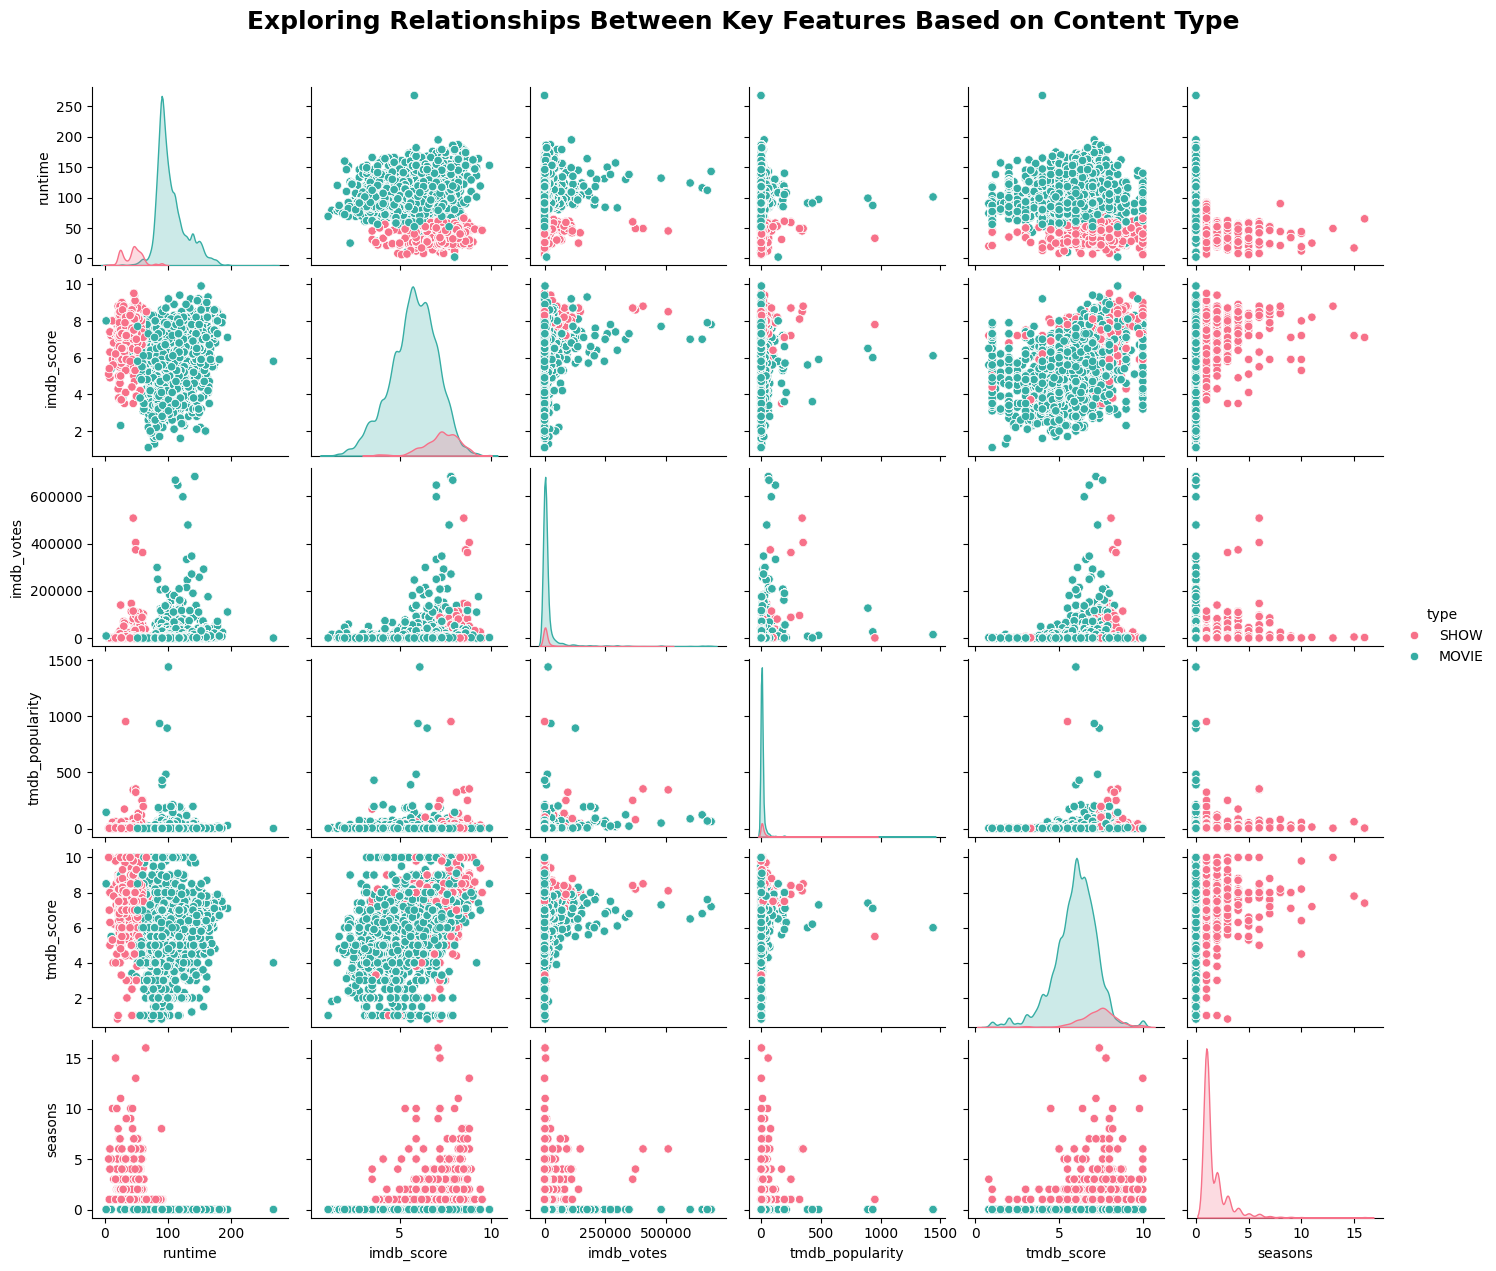

In [ ]:
# Pair Plot visualization code

# Selecting relevant numerical columns
correlation_columns = ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'seasons']


# Creating pair plot with 'type' as hue
pairplot = sns.pairplot(
    df,
    vars=correlation_columns,
    hue='type',  # Color based on 'type'
    palette='husl',
    diag_kind='kde',  # Kernel Density Estimate for diagonal

)

# Adjusting the figure size
pairplot.fig.set_size_inches(15, 12)


# Adjust the title and overall layout
pairplot.fig.suptitle('Exploring Relationships Between Key Features Based on Content Type', fontsize=18, fontweight='bold', y=1.05)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot is an effective way to explore relationships between multiple numerical variables while incorporating a categorical hue. It provides scatter plots for pairwise comparisons, helping to identify trends, clusters, and correlations within the data.

Since the goal is to analyze interactions between runtime, IMDb score, votes, popularity, TMDB score, and seasons while distinguishing between different content types (TV shows vs. Movies), a pair plot is the best choice to reveal these patterns visually.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, I observed that runtime and seasons show clear differences between movies and TV shows. IMDb scores and TMDB scores have a similar distribution but vary slightly in density. IMDb votes and TMDB popularity do not show a strong relationship. The KDE plots help in understanding how different content types are distributed across key metrics.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Solution for Optimizing Content Curation and Audience Engagement

* To get more Audience Engagement Amazon Prime can focus on balancing its genre distribution by expanding Fantasy and Sci-Fi content .

* Optimizing content discovery.

* Companies can plan releases based on peak-performing genres, ensuring better audience engagement.

* Improve search filters, subtitles, and dubbing options to get  global audience.

* Invest in original movies, shows, and exclusive partnerships to attract and retain viewers.

*  Allow users to share watchlists, reviews, and favorite moments directly on social platforms.

* Conduct regular surveys, ratings, and reviews to understand audience preferences and improve content offerings.

* Regular Server Maintenance.

* Stay competitive.

# **Conclusion**

- Amazon Prime Video has a diverse range of content, including both movies and TV shows.

- Some genres like (Drama ,comedy) dominate the platform, while others have limited representation.

- The number of titles added to Amazon Prime has fluctuated over the years.

- Certain countries like (US,IND) contribute significantly to Amazon Prime's content library.

- Ratings provide key insights into audience preferences.

- IMDb and TMDB scores help gauge audience preferences.

- TV shows vary significantly in the number of seasons, with some long-running series and many single-season shows.

- Understanding content trends can help Amazon Prime optimize its library for audience engagement.

- Investing in high-rated and popular content can improve user retention and platform engagement.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***